In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
defendant_csv = '../data/complete_defendants.csv'
#victim_csv = '../data/complete_victims.csv'

df = pd.read_csv(defendant_csv)
#victim_df = pd.read_csv(victim_csv)

In [12]:
male = df[df.gender=='male']
female = df[df.gender=='female']

In [19]:
male_years_df = male.year.value_counts().sort_index()
male_years = male_years_df.index.to_list()
male_numbers = male_years_df.to_list()

In [21]:
fem_years_df = female.year.value_counts().sort_index()
fem_years =fem_years_df.index.to_list()
fem_numbers = fem_years_df.to_list()

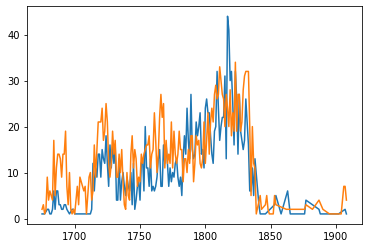

In [22]:
plt.plot(male_years, male_numbers)
plt.plot(fem_years, fem_numbers)

In [23]:
male_decade_years= list()
male_decade_counts = list()
fem_decade_years = list()
fem_decade_counts = list()

for label, df in male.groupby((male["year"]//10*10)):
    male_decade_years.append(label)
    male_decade_counts.append(len(df))
    
for label, df in female.groupby((female["year"]//10*10)):
    fem_decade_years.append(label)
    fem_decade_counts.append(len(df))

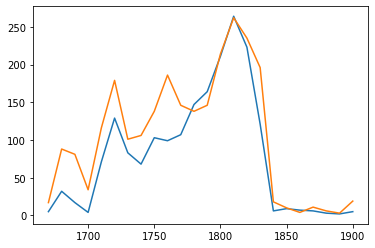

In [24]:
plt.plot(male_decade_years, male_decade_counts)
plt.plot(fem_decade_years, fem_decade_counts)

In [100]:
sparql = '../data/sparql_query.csv'

In [101]:
df = pd.read_csv(sparql)

for i, row in df.iterrows():
    if 'def' in row.p:
        df.at[i, 'role'] = 'defendant'
    else:
        df.at[i, 'role'] = 'victim'
    years = row.p.split('/')
    df.at[i, 'year'] = int(years[-1][1:5])
    genders = row.g.split('/')
    df.at[i, 'g'] = genders[-1]

df.head()

,p,dm,d,g,role,year
0,http://cltl.nl/oldbailey/t16760114-1-defend2,servant,http://cltl.nl/oldbailey/t16760114-1-deflabel1,male,defendant,1676.0
1,http://cltl.nl/oldbailey/t16760114-1-defend2,servant,http://cltl.nl/oldbailey/t16760114-1-deflabel1,male,defendant,1676.0
2,http://cltl.nl/oldbailey/t16761213-11-defend18,servant,http://cltl.nl/oldbailey/t16761213-11-deflabel35,female,defendant,1676.0
3,http://cltl.nl/oldbailey/t16761213-11-defend18,servant,http://cltl.nl/oldbailey/t16761213-11-deflabel35,female,defendant,1676.0
4,http://cltl.nl/oldbailey/t16770425-6-victim10,servant,http://cltl.nl/oldbailey/t16770425-6-viclabel16,female,victim,1677.0


In [102]:
df.drop('d', axis=1, inplace=True)
df.drop('p', axis=1, inplace=True)

In [103]:
male = df[df.g == 'male']
female = df[df.g == 'female']

In [104]:
mdf = male.year.value_counts().sort_index()
myears = mdf.index.to_list()
mnumbers = mdf.to_list()

fdf = female.year.value_counts().sort_index()
fyears = fdf.index.to_list()
fnumbers = fdf.to_list()

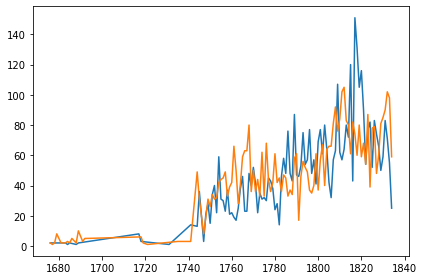

In [105]:
plt.plot(myears, mnumbers)
plt.plot(fyears, fnumbers)
plt.tight_layout()

In [106]:
male_decade_years= list()
male_decade_counts = list()
fem_decade_years = list()
fem_decade_counts = list()

for label, df in male.groupby((male["year"]//10*10)):
    male_decade_years.append(label)
    male_decade_counts.append(len(df))
    
for label, df in female.groupby((female["year"]//10*10)):
    fem_decade_years.append(label)
    fem_decade_counts.append(len(df))

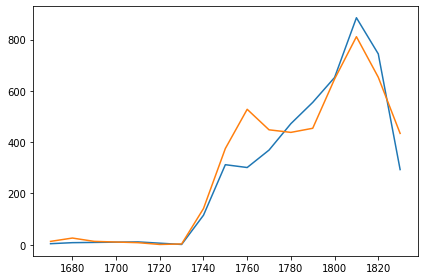

In [107]:
plt.plot(male_decade_years, male_decade_counts)
plt.plot(fem_decade_years, fem_decade_counts)
plt.tight_layout()

In [110]:
df.year.describe()

count     434.000000
mean     1831.898618
std         1.324436
min      1830.000000
25%      1831.000000
50%      1832.000000
75%      1833.000000
max      1834.000000
Name: year, dtype: float64